In [9]:
# historgram of top 10 breweries


In [16]:
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


from flask import Flask, jsonify
from flask_cors import CORS, cross_origin

In [17]:
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Denver_beer_wine_whiskey.sqlite")

In [18]:
engine.execute('SELECT * FROM denverBeer2 LIMIT 1').fetchall()

[(0, 'DNKucP0SZ7ea-nOZgetFhg', 'Great Divide Brewing Company', 'https://s3-media3.fl.yelpcdn.com/bphoto/KAccMuhlXGS1PqkdUNpGJA/o.jpg', 0, 'https://www.yelp.com/biz/great-divide-brewing-company-denver?adjust_creative=2HS7cwZSZjB4KpQC_8JOTw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=2HS7cwZSZjB4KpQC_8JOTw', 1008, 'Brewery', 4.5, '$', '(303) 296-9460', 39.7539, -104.98846, '2201 Arapahoe St', None, None, 'Denver', 80205, 'US', 'CO')]

In [19]:
r = engine.execute('SELECT name_, rating, review_count FROM denverBeer2 ORDER BY rating DESC LIMIT 10').fetchall()

In [20]:
df = pd.DataFrame(r, columns=['name_', 'rating', 'review_count'])

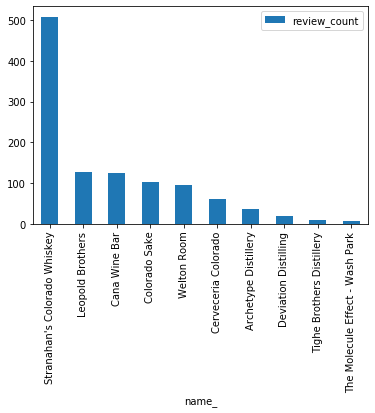

In [21]:
df.sort_values(by='review_count', ascending=False).plot.bar('name_', 'review_count')

In [30]:
engine = create_engine("sqlite:///Denver_beer_wine_whiskey.sqlite", echo=True)
sqlite_conn = engine.connect()

2020-10-22 12:36:56,804 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-10-22 12:36:56,805 INFO sqlalchemy.engine.base.Engine ()
2020-10-22 12:36:56,806 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-10-22 12:36:56,807 INFO sqlalchemy.engine.base.Engine ()


In [31]:
r = engine.execute("SELECT name_, rating, review_count FROM review_count ORDER BY city DESC LIMIT 12;").fetchall()

2020-10-22 12:36:57,172 INFO sqlalchemy.engine.base.Engine SELECT name_, rating, review_count FROM review_count ORDER BY city DESC LIMIT 12;
2020-10-22 12:36:57,173 INFO sqlalchemy.engine.base.Engine ()
2020-10-22 12:36:57,174 INFO sqlalchemy.engine.base.Engine ROLLBACK


OperationalError: (sqlite3.OperationalError) no such table: review_count
[SQL: SELECT name_, rating, review_count FROM review_count ORDER BY city DESC LIMIT 12;]
(Background on this error at: http://sqlalche.me/e/e3q8)

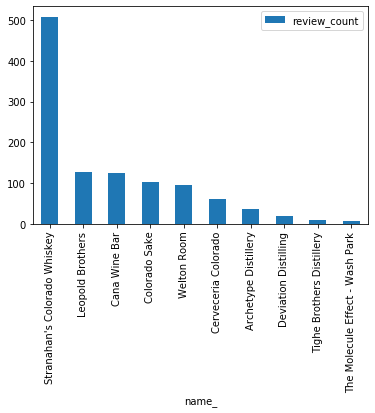

In [24]:
df = pd.DataFrame(r, columns=['name_', 'rating', 'review_count'])
df.sort_values(by='review_count', ascending=False).plot.bar('name_', 'review_count')

In [ ]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# table reference
breweryDB = Base.classes.denverBeer

#################################################
# Flask Setup
#################################################
app = Flask(__name__)

CORS(app)
#################################################
# Flask Routes
#################################################

@app.route("/")

@app.route("/api/v1.0/bar_names")
def barNames():
    # session (link) from Python to the DB
    session = Session(engine)

    # Query bar names
    results = session.query(breweryDB.name_).all()
    session.close()

    # Convert list of tuples into normal list
    bar_names = list(np.ravel(results))

    return jsonify(bar_names)


@app.route("/api/v1.0/bar_data")
def barData():
    # Create our session (link) from Python to the DB
    session = Session(engine)

    # Query bar latitude, longitude, and rating
    results = session.query(breweryDB.latitude, breweryDB.longitude, breweryDB.rating, breweryDB.category, breweryDB.address1, breweryDB.zip_code).all()

    session.close()

    # Create a dictionary from the row data and append to a list of all_passengers
    bar_data = []
    for latitude, longitude, rating, category, address1, zip_code in results:
        brewery_dict = {}
        brewery_dict["latitude"] = latitude
        brewery_dict["longitude"] = longitude
        brewery_dict["rating"] = rating
        brewery_dict["category"] = category
        brewery_dict["address"] = address1
        brewery_dict["zip_code"] = zip_code
        bar_data.append(brewery_dict)

    return jsonify(bar_data)

if __name__ == '__main__':
    app.run(debug=True)